# Forecast Tutorial

This tutorial will walk through forecast data from Unidata forecast model data using the forecast.py module within pvlib.

Table of contents:
1. [Setup](#Setup)
2. [Intialize and Test Each Forecast Model](#Instantiate-GFS-forecast-model)

This tutorial has been tested against the following package versions:
* Python 3.5.2
* IPython 5.0.0
* pandas 0.18.0
* matplotlib 1.5.1
* netcdf4 1.2.1
* siphon 0.4.0

It should work with other Python and Pandas versions. It requires pvlib >= 0.3.0 and IPython >= 3.0.

Authors:
* Derek Groenendyk (@moonraker), University of Arizona, November 2015
* Will Holmgren (@wholmgren), University of Arizona, November 2015, January 2016, April 2016, July 2016

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# built in python modules
import datetime
import os

# python add-ons
import numpy as np
import pandas as pd

# for accessing UNIDATA THREDD servers
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS

import pvlib
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP

/Users/holmgren/git_repos/pvlib-python/pvlib/forecast.py:22: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'module, or the module may be separated into its own package.')


In [2]:
# Choose a location and time.
# Tucson, AZ
latitude = 32.2
longitude = -110.9 
tz = 'America/Phoenix'

start = pd.Timestamp(datetime.date.today(), tz=tz) # today's date
end = start + pd.Timedelta(days=7) # 7 days from today
print(start, end)

2018-11-02 00:00:00-07:00 2018-11-09 00:00:00-07:00


## GFS (0.5 deg)

In [3]:
from pvlib.forecast import GFS, HRRR_ESRL, NAM, NDFD, HRRR, RAP 

In [4]:
# GFS model, defaults to 0.5 degree resolution
fm = GFS()

In [5]:
# retrieve data
data = fm.get_data(latitude, longitude, start, end)

In [6]:
data

,Total_cloud_cover_middle_cloud_Mixed_intervals_Average,Total_cloud_cover_low_cloud_Mixed_intervals_Average,Total_cloud_cover_high_cloud_Mixed_intervals_Average,Total_cloud_cover_convective_cloud,Wind_speed_gust_surface,Total_cloud_cover_boundary_layer_cloud_Mixed_intervals_Average,Total_cloud_cover_entire_atmosphere_Mixed_intervals_Average,Downward_Short-Wave_Radiation_Flux_surface_Mixed_intervals_Average,Temperature_surface,u-component_of_wind_isobaric,v-component_of_wind_isobaric
2018-11-02 09:00:00-07:00,0.0,0.0,0.0,0.0,0.509245,0.0,0.0,0.0,283.200012,0.321284,0.248196
2018-11-02 12:00:00-07:00,0.0,0.0,0.0,0.0,2.101461,0.0,0.0,0.0,282.005310,-1.861433,1.069207
2018-11-02 15:00:00-07:00,0.0,0.0,0.0,0.0,2.566809,0.0,0.0,40.0,287.624451,-2.283450,1.166477
2018-11-02 18:00:00-07:00,0.0,0.0,0.0,0.0,1.747412,0.0,0.0,270.0,305.084930,-0.873062,-1.077307
2018-11-02 21:00:00-07:00,0.0,0.0,0.0,0.0,1.246185,0.0,0.0,710.0,306.769226,0.287397,-1.644556
2018-11-03 00:00:00-07:00,0.0,0.0,0.0,0.0,2.926880,0.0,0.0,539.0,293.770508,1.493616,-2.456653
2018-11-03 03:00:00-07:00,0.0,0.0,0.0,0.0,2.140588,0.0,0.0,10.0,287.340759,1.216316,-1.649683
2018-11-03 06:00:00-07:00,0.0,0.0,0.0,0.0,1.374021,0.0,0.0,3.0,285.443115,0.928799,-1.032666
2018-11-03 09:00:00-07:00,0.0,0.0,0.0,0.0,0.572020,0.0,0.0,0.0,283.886292,0.632527,-0.077568
2018-11-03 12:00:00-07:00,0.0,0.0,7.0,0.0,1.071779,0.0,7.0,0.0,282.712952,0.219133,1.064648


In [7]:
data = fm.process_data(data)

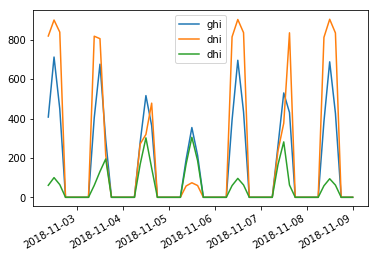

In [8]:
data[['ghi', 'dni', 'dhi']].plot()

In [9]:
cs = fm.location.get_clearsky(data.index)

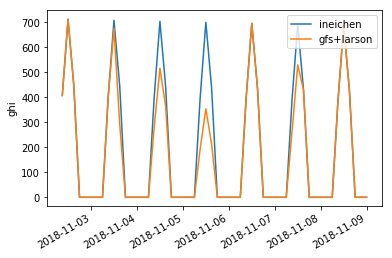

In [10]:
fig, ax = plt.subplots()
cs['ghi'].plot(ax=ax, label='ineichen')
data['ghi'].plot(ax=ax, label='gfs+larson')
ax.set_ylabel('ghi')
ax.legend()

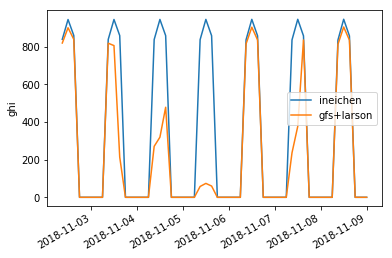

In [11]:
fig, ax = plt.subplots()
cs['dni'].plot(ax=ax, label='ineichen')
data['dni'].plot(ax=ax, label='gfs+larson')
ax.set_ylabel('ghi')
ax.legend()

In [12]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [13]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2018-11-02 09:00:00-07:00,10.050018,0.405986,407.358602,818.731315,60.841352,0.0,0.0,0.0,0.0
2018-11-02 12:00:00-07:00,8.855316,2.146657,711.945346,899.784644,99.890062,0.0,0.0,0.0,0.0
2018-11-02 15:00:00-07:00,14.474457,2.564139,448.721044,838.526803,64.338163,0.0,0.0,0.0,0.0
2018-11-02 18:00:00-07:00,31.934937,1.386660,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2018-11-02 21:00:00-07:00,33.619232,1.669479,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2018-11-03 00:00:00-07:00,20.620514,2.875071,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2018-11-03 03:00:00-07:00,14.190765,2.049604,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2018-11-03 06:00:00-07:00,12.293121,1.388908,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2018-11-03 09:00:00-07:00,10.736298,0.637265,403.560574,817.693817,60.445428,0.0,0.0,0.0,0.0
2018-11-03 12:00:00-07:00,9.562958,1.086966,675.605949,805.179960,131.125563,7.0,0.0,0.0,7.0


Text(0,0.5,'temperature (C)')

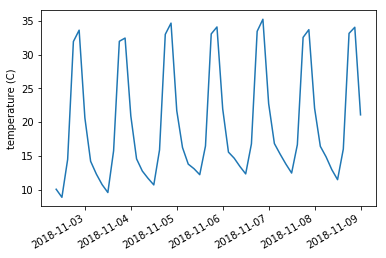

In [14]:
data['temp_air'].plot()
plt.ylabel('temperature (%s)' % fm.units['temp_air'])

In [15]:
cloud_vars = ['total_clouds', 'low_clouds', 'mid_clouds', 'high_clouds']

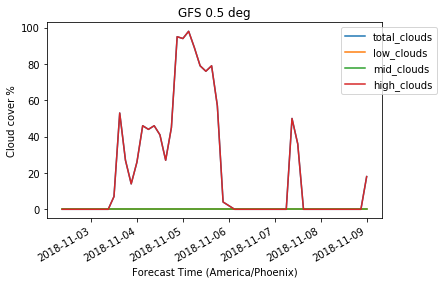

In [16]:
for varname in cloud_vars:
    data[varname].plot()
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [17]:
total_cloud_cover = data['total_clouds']

Text(0.5,1,'GFS 0.5 deg')

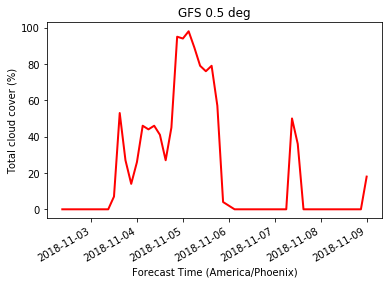

In [18]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.5 deg')

## GFS (0.25 deg)

In [19]:
# GFS model at 0.25 degree resolution
fm = GFS(resolution='quarter')

In [20]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

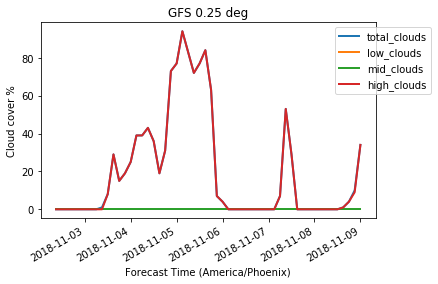

In [21]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('GFS 0.25 deg')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [22]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2018-11-02 09:00:00-07:00,17.866241,0.359686,407.358602,818.731315,60.841352,0.0,0.0,0.0,0.0
2018-11-02 12:00:00-07:00,16.749969,1.949517,711.945346,899.784644,99.890062,0.0,0.0,0.0,0.0
2018-11-02 15:00:00-07:00,18.483185,2.454866,448.721044,838.526803,64.338163,0.0,0.0,0.0,0.0
2018-11-02 18:00:00-07:00,29.734955,0.852877,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2018-11-02 21:00:00-07:00,32.950012,1.189831,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2018-11-03 00:00:00-07:00,26.054901,2.562810,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2018-11-03 03:00:00-07:00,21.990784,2.282499,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2018-11-03 06:00:00-07:00,19.966278,1.623425,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2018-11-03 09:00:00-07:00,18.574249,0.870438,400.937428,808.693204,61.599059,1.0,0.0,0.0,0.0
2018-11-03 12:00:00-07:00,17.594971,0.550552,671.005171,789.166843,137.353207,8.0,0.0,0.0,8.0


## NAM

In [23]:
fm = NAM()

In [24]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

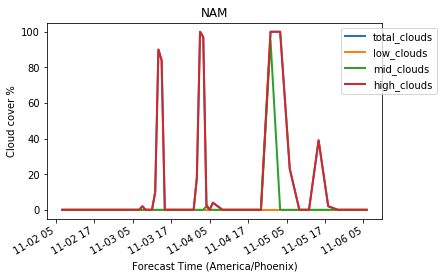

In [25]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NAM')
plt.legend(bbox_to_anchor=(1.18,1.0))

Text(0.5,0,'Forecast Time (America/Phoenix)')

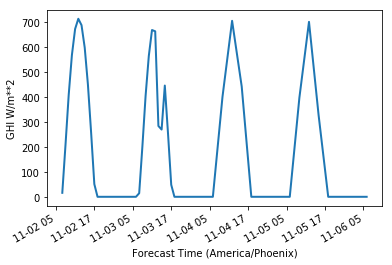

In [26]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')

In [27]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2018-11-02 07:00:00-07:00,9.042969,2.359449,15.898465,0.000000,15.898465,0.0,0.0,0.0,0.0
2018-11-02 08:00:00-07:00,8.280884,2.285714,207.367295,631.164838,49.568030,0.0,0.0,0.0,0.0
2018-11-02 09:00:00-07:00,7.510162,2.357424,407.358602,818.731315,60.841352,0.0,0.0,0.0,0.0
2018-11-02 10:00:00-07:00,6.727661,2.217205,566.861073,877.336580,77.061741,0.0,0.0,0.0,0.0
2018-11-02 11:00:00-07:00,6.110291,2.220286,671.081727,895.759140,92.480010,0.0,0.0,0.0,0.0
2018-11-02 12:00:00-07:00,5.610443,1.445311,711.945346,899.784644,99.890062,0.0,0.0,0.0,0.0
2018-11-02 13:00:00-07:00,5.477905,2.433594,686.420887,897.464738,95.161814,0.0,0.0,0.0,0.0
2018-11-02 14:00:00-07:00,5.648712,2.359876,596.392581,883.850233,80.974106,0.0,0.0,0.0,0.0
2018-11-02 15:00:00-07:00,11.683533,2.229287,448.721044,838.526803,64.338163,0.0,0.0,0.0,0.0
2018-11-02 16:00:00-07:00,18.863037,2.815744,256.189545,692.798407,53.154912,0.0,0.0,0.0,0.0


## NDFD

In [28]:
fm = NDFD()

In [29]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [30]:
total_cloud_cover = data['total_clouds']
temp = data['temp_air']
wind = data['wind_speed']

(0, 100)

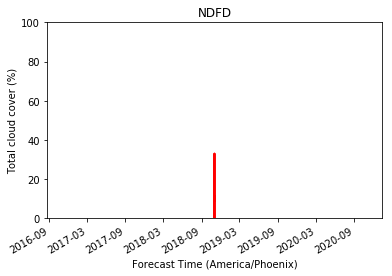

In [31]:
total_cloud_cover.plot(color='r', linewidth=2)
plt.ylabel('Total cloud cover' + ' (%s)' % fm.units['total_clouds'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('NDFD')
plt.ylim(0,100)

In [32]:
temp.plot(color='r', linewidth=2)
plt.ylabel('Temperature' + ' (%s)' % fm.units['temp_air'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')    

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11ca41488> (for post_execute):


ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [34]:
wind.plot(color='r', linewidth=2)
plt.ylabel('Wind Speed' + ' (%s)' % fm.units['wind_speed'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')   

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11ca41488> (for post_execute):


ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [35]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds
2018-11-02 00:00:00-07:00,NaN,NaN,0.0,0.0,0.0,11.0
2018-11-02 00:00:00-07:00,NaN,NaN,0.0,0.0,0.0,11.0
2018-11-02 00:00:00-07:00,NaN,NaN,0.0,0.0,0.0,11.0
2018-11-02 00:00:00-07:00,NaN,NaN,0.0,0.0,0.0,11.0
2018-11-02 00:00:00-07:00,NaN,NaN,0.0,0.0,0.0,11.0
2018-11-02 00:00:00-07:00,NaN,NaN,0.0,0.0,0.0,11.0
2018-11-02 00:00:00-07:00,NaN,NaN,0.0,0.0,0.0,11.0
2018-11-02 00:00:00-07:00,NaN,NaN,0.0,0.0,0.0,11.0
2018-11-02 00:00:00-07:00,NaN,NaN,0.0,0.0,0.0,11.0
2018-11-02 00:00:00-07:00,NaN,NaN,0.0,0.0,0.0,11.0


## RAP

In [34]:
fm = RAP(resolution=20)

In [35]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

In [36]:
cloud_vars = ['total_clouds', 'high_clouds', 'mid_clouds', 'low_clouds']

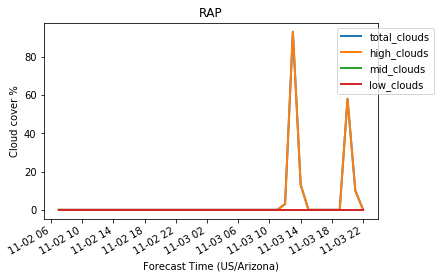

In [37]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('RAP')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [38]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2018-11-02 07:00:00-07:00,8.860504,1.135160,15.898465,0.000000,15.898465,0.0,0.0,0.0,0.0
2018-11-02 08:00:00-07:00,8.247345,1.324239,207.367295,631.164838,49.568030,0.0,0.0,0.0,0.0
2018-11-02 09:00:00-07:00,7.579926,1.104332,407.358602,818.731315,60.841352,0.0,0.0,0.0,0.0
2018-11-02 10:00:00-07:00,7.046539,1.495911,566.861073,877.336580,77.061741,0.0,0.0,0.0,0.0
2018-11-02 11:00:00-07:00,6.581604,1.787012,671.081727,895.759140,92.480010,0.0,0.0,0.0,0.0
2018-11-02 12:00:00-07:00,5.881744,1.747029,711.945346,899.784644,99.890062,0.0,0.0,0.0,0.0
2018-11-02 13:00:00-07:00,5.473267,1.717933,686.420887,897.464738,95.161814,0.0,0.0,0.0,0.0
2018-11-02 14:00:00-07:00,5.062897,1.585807,596.392581,883.850233,80.974106,0.0,0.0,0.0,0.0
2018-11-02 15:00:00-07:00,9.387787,1.220390,448.721044,838.526803,64.338163,0.0,0.0,0.0,0.0
2018-11-02 16:00:00-07:00,14.636536,2.336682,256.189545,692.798407,53.154912,0.0,0.0,0.0,0.0


## HRRR

In [36]:
fm = HRRR()

In [37]:
data_raw = fm.get_data(latitude, longitude, start, end)

In [38]:
# The HRRR model pulls in u, v winds for 2 layers above ground (10 m, 80 m)
# They are labeled as _0, _1 in the raw data
data_raw

,Total_cloud_cover_entire_atmosphere,Medium_cloud_cover_middle_cloud,Wind_speed_gust_surface,Pressure_surface,Low_cloud_cover_low_cloud,High_cloud_cover_high_cloud,Temperature_height_above_ground,v-component_of_wind_height_above_ground_0,v-component_of_wind_height_above_ground_1,u-component_of_wind_height_above_ground_0,u-component_of_wind_height_above_ground_1
2018-11-02 07:00:00-07:00,0.00,0.0,2.858998,93110.906250,0.0,0.00,282.734772,1.703051,2.652807,-0.149881,-2.156889
2018-11-02 08:00:00-07:00,0.00,0.0,3.175681,93110.906250,0.0,0.00,281.940887,1.738281,2.975603,-0.135754,-2.348145
2018-11-02 09:00:00-07:00,0.00,0.0,2.922028,93110.906250,0.0,0.00,281.278748,1.895540,2.626053,-0.073610,-2.119377
2018-11-02 10:00:00-07:00,0.00,0.0,3.088861,93111.132812,0.0,0.00,280.820709,1.928577,2.535147,-0.490700,-2.733677
2018-11-02 11:00:00-07:00,0.00,0.0,2.993270,93111.132812,0.0,0.00,280.465454,1.744240,2.407396,-0.573812,-3.008923
2018-11-02 12:00:00-07:00,0.00,0.0,3.095059,93111.132812,0.0,0.00,280.178925,2.080114,2.108854,-0.923473,-3.160629
2018-11-02 13:00:00-07:00,0.00,0.0,2.409759,93111.132812,0.0,0.00,279.564240,1.481094,1.845154,0.351240,-1.726856
2018-11-02 14:00:00-07:00,0.00,0.0,2.849967,93211.132812,0.0,0.00,279.494690,2.133972,2.316422,0.152163,-2.237305
2018-11-02 15:00:00-07:00,0.00,0.0,2.797340,93210.906250,0.0,0.00,283.085602,1.355753,2.130508,0.265211,-2.017151
2018-11-02 16:00:00-07:00,0.00,0.0,3.139177,93211.132812,0.0,0.00,287.273499,1.075033,1.475357,-0.157167,-1.627764


In [44]:
data = fm.get_processed_data(latitude, longitude, start, end)

In [45]:
cloud_vars = ['total_clouds', 'high_clouds', 'mid_clouds', 'low_clouds']

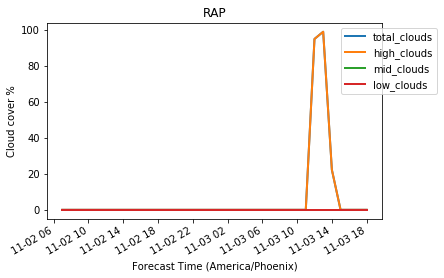

In [46]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('RAP')
plt.legend(bbox_to_anchor=(1.18,1.0))

Text(0.5,0,'Forecast Time (America/Phoenix)')

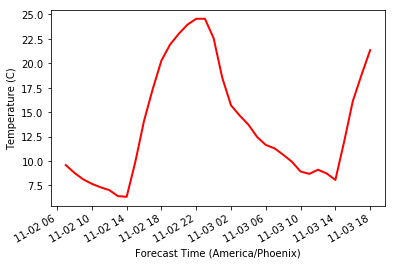

In [47]:
data['temp_air'].plot(color='r', linewidth=2)
plt.ylabel('Temperature' + ' (%s)' % fm.units['temp_air'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')    

Text(0.5,0,'Forecast Time (America/Phoenix)')

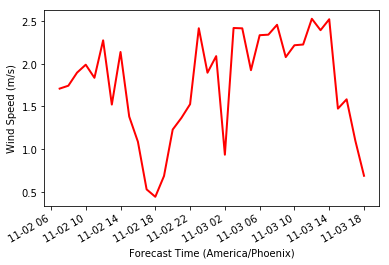

In [48]:
data['wind_speed'].plot(color='r', linewidth=2)
plt.ylabel('Wind Speed' + ' (%s)' % fm.units['wind_speed'])
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')   

In [49]:
data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2018-11-02 07:00:00-07:00,9.584778,1.709633,15.898465,0.000000,15.898465,0.00,0.0,0.0,0.00
2018-11-02 08:00:00-07:00,8.790894,1.743574,207.367295,631.164838,49.568030,0.00,0.0,0.0,0.00
2018-11-02 09:00:00-07:00,8.128754,1.896969,407.358602,818.731315,60.841352,0.00,0.0,0.0,0.00
2018-11-02 10:00:00-07:00,7.670715,1.990024,566.861073,877.336580,77.061741,0.00,0.0,0.0,0.00
2018-11-02 11:00:00-07:00,7.315460,1.836201,671.081727,895.759140,92.480010,0.00,0.0,0.0,0.00
2018-11-02 12:00:00-07:00,7.028931,2.275891,711.945346,899.784644,99.890062,0.00,0.0,0.0,0.00
2018-11-02 13:00:00-07:00,6.414246,1.522173,686.420887,897.464738,95.161814,0.00,0.0,0.0,0.00
2018-11-02 14:00:00-07:00,6.344696,2.139390,596.392581,883.850233,80.974106,0.00,0.0,0.0,0.00
2018-11-02 15:00:00-07:00,9.935608,1.381450,448.721044,838.526803,64.338163,0.00,0.0,0.0,0.00
2018-11-02 16:00:00-07:00,14.123505,1.086461,256.189545,692.798407,53.154912,0.00,0.0,0.0,0.00


## HRRR (ESRL)

In [45]:
fm = HRRR_ESRL()

/Users/holmgren/git_repos/pvlib-python/pvlib/forecast.py:781: UserWarning: HRRR_ESRL is an experimental model and is not always available.
  warnings.warn('HRRR_ESRL is an experimental model and is not '


In [46]:
# retrieve data
data = fm.get_processed_data(latitude, longitude, start, end)

KeyboardInterrupt: 

In [ ]:
cloud_vars = ['total_clouds','high_clouds','mid_clouds','low_clouds']

In [ ]:
for varname in cloud_vars:
    data[varname].plot(ls='-', linewidth=2)
plt.ylabel('Cloud cover' + ' %')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')
plt.title('HRRR_ESRL')
plt.legend(bbox_to_anchor=(1.18,1.0))

In [ ]:
data['ghi'].plot(linewidth=2, ls='-')
plt.ylabel('GHI W/m**2')
plt.xlabel('Forecast Time ('+str(data.index.tz)+')')

## Quick power calculation

In [50]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.modelchain import ModelChain

sandia_modules = retrieve_sam('SandiaMod')
sapm_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_']

system = PVSystem(module_parameters=module,
                  inverter_parameters=inverter)

# fx is a common abbreviation for forecast
fx_model = GFS()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location,
                orientation_strategy='south_at_latitude_tilt')

# extract relevant data for model chain
mc.run_model(fx_data.index, weather=fx_data)

/Users/holmgren/git_repos/pvlib-python/pvlib/pvsystem.py:1917: RuntimeWarning: invalid value encountered in maximum
  spectral_loss = np.maximum(0, np.polyval(am_coeff, airmass_absolute))


ModelChain: 
  name: None
  orientation_strategy: south_at_latitude_tilt
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temp_model: sapm_temp
  losses_model: no_extra_losses

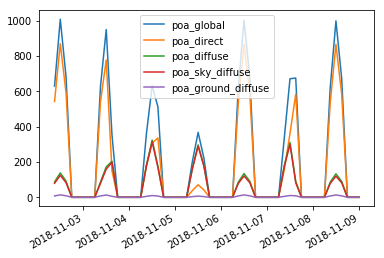

In [51]:
mc.total_irrad.plot()

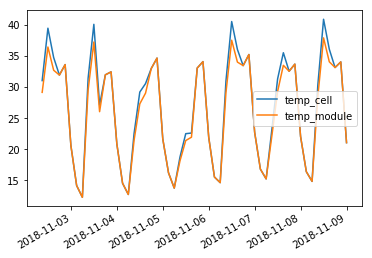

In [52]:
mc.temps.plot()

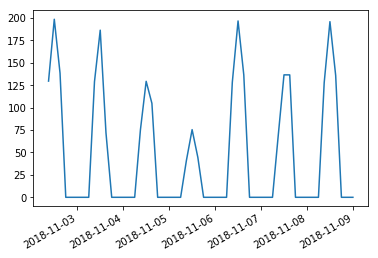

In [53]:
mc.ac.plot()